<a href="https://colab.research.google.com/github/nagnimit03/Bitcoin-Prediction-Time-Series-Forecasting/blob/main/Bitcoin_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In time series we will be going to cover problems what will be the price of bitcoin tomorrow like 50k. So it is a continuous value.Usualliy in classfication , we have discrete values so usually it is a label.

Input and outshapes of a bitcoin price prediction problem.Window is the amount of data we will be putting into the model. may be a week or a month or an year. So the shape will be [batch size , window size]. Since we don't have much data for a time series problem we might increase the batch size from 32 to 64 or 128 or maybe even more.window size will depend on if we are taking a week data or a month data or year data.
Horizon is usually the output we will be predicting.
Now this will be many to one problem if we are giving an input of 1 week and we will be predicting the price the next day but can be a many to many problem if we are giving an input of previous week and we will bepredicting the price of bitcon the entire next week.
if prediction is for one day the horizon is going to be one and if the prediction price is going to be for one week then horizon price is going to be 7.

We are going to use the previous data of bitcoin till 18 may 2021 and we will be predicitng the price of bitcoin

The frequency at which time series data is collected is termed as seasonality.for eg if time frames collected are weekly then we will be having 52 samples but if the samples are collected each day then we will be having 365 samples in year. Usually in time series data , the data is not as large as data in other problem like in vision or nlp

Different types of time series(various patterns in time series) -

Trend - time series has a clear long term increase or decrease(may or may not be linear)

Seasonal - time series is affected by seasonal factors such as weekends or during the festivals.

cyclic - time series shows rises and falls in unfixed period of time. the difference between seasonal and cyclic is that season is for fixed period of time but cyclic can be uncertainas well as unfixed

On the basis of variable we can classify time series as -

1.Univariate - only one variable is plotted in the time series

2.Multivariate - 2 variables are plotted in the time series

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-14 16:30:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-09-14 16:30:31 (10.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
###importing time series data with pandas
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv")
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Date                 2787 non-null   object 
 2   Closing Price (USD)  2787 non-null   float64
 3   24h Open (USD)       2787 non-null   float64
 4   24h High (USD)       2787 non-null   float64
 5   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(2)
memory usage: 130.8+ KB


In [4]:
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"])### parse the date column and tell pandas column 1 is a datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [6]:
bitcoin_prices=pd.DataFrame(df['Closing Price (USD)'])
bitcoin_prices.head()

,Closing Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


<Axes: xlabel='Date'>

<Figure size 700x700 with 0 Axes>

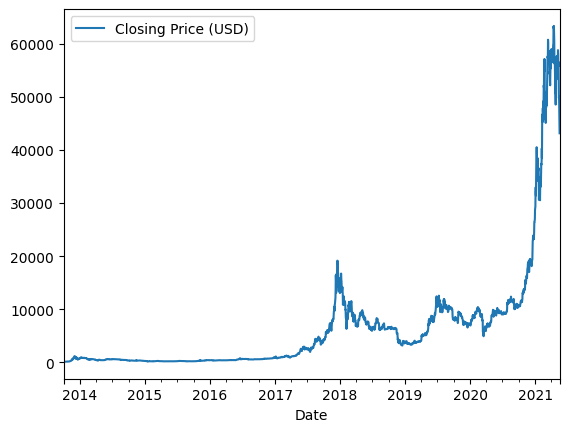

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
bitcoin_prices.plot()

Now we cannot use train test split for splitting the data fro time series because train test split splits the data on a random basis but time series is a continuous problem so data needs to be continuous problem. So correct way to split the data would be

In [8]:
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Closing Price (USD)"].to_numpy()
index=int(0.80*len(bitcoin_prices))
X_train,y_train=timesteps[:index],prices[:index]
X_test,y_test=timesteps[index:],prices[index:]

In [21]:
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

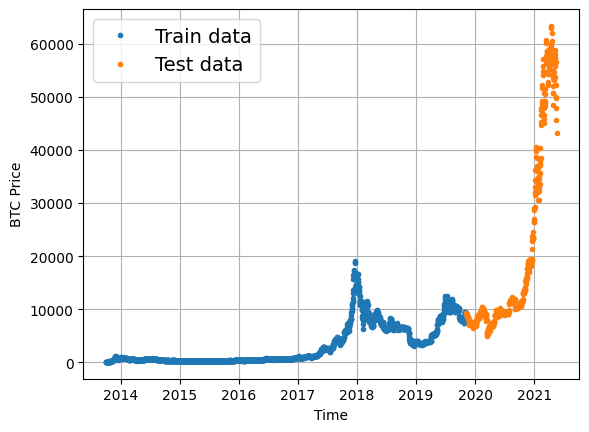

In [22]:
plot_time_series(timesteps=X_train,values=y_train,label='Train data')
plot_time_series(timesteps=X_test,values=y_test,label='Test data')

I will be executing the following model in this project

0. Naive Model - Baseline model
1. Dense Model , horizon =1 , wondow = 7
2. Same as model 1 but with a different window  , horizon =1 ,window=30
3. Same as model 2 but with a different window size,horizon =7 , window = 30
4. Conv 1d
5. LSTM
6. Same as model 1 but with multivariate data
7. NBEATS Algortihm
8. Ensemble where multiple models are stacks together
9. Future prediction model
10. same as model 1 but introducing turkey data

For naïve forecasts, we simply set all forecasts to be the value of the last observation.. So basically we set the value to be predicted on a particular day equal to the value last day the value it was.

y
T
+
h
|
T
=
y
T
.
Theprediction at timestep T (y-hat) is equal to the value at timestep T-1. - This is forhorizon 1.

where y is the value we are trying to predict and h is the horizon we have given.
So we are saying newxt forecast is the previous value. So let us suppose price of bitcoin is x today and we are trying to predict the price of bitcoin tomorrow then we simply say that price tomorrow will be x.

In [12]:
###Model 0 :Naive forecast baseline
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [18]:
naive_forecast=y_test[:-1]### this will transfer all the values of y_test to naive forecast except -1

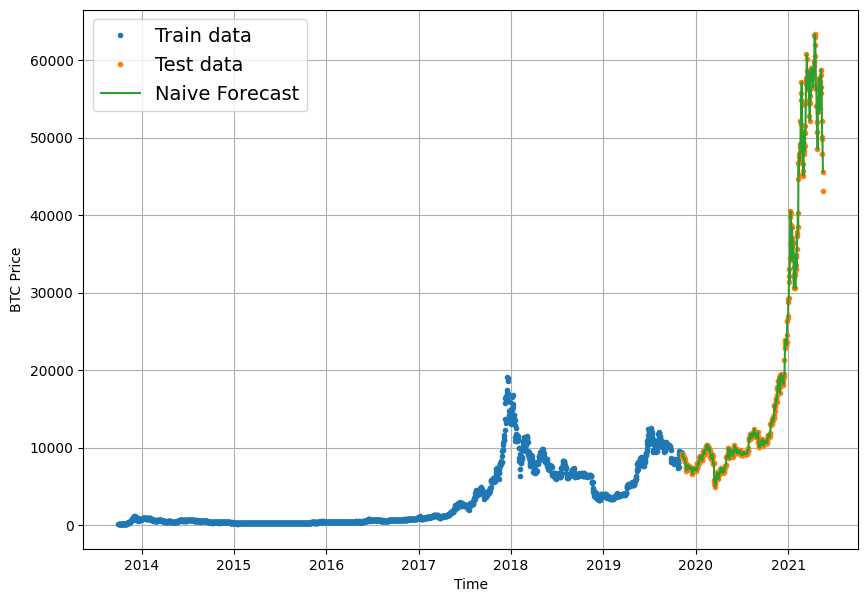

In [23]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format='-',label="Naive Forecast")

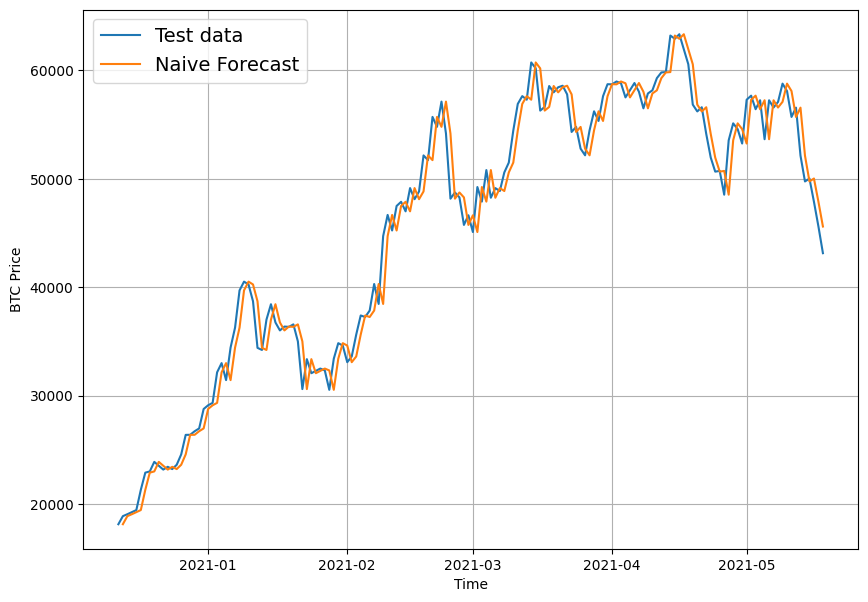

In [25]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test,values=y_test,start=400,format='-',label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format='-',start=400,label="Naive Forecast")

Evaluating a time series Model.Since we will be predicting a value over various horizons so we will be following evaluation metrics related to regression

*   Mean Absolute Error
*   Mean Squared Error

*   Root Mean Squared Error
*   Symetric Mean absolute percentage error

*   Mean Absolute scaled error - if the forecast is better than naive it will be less than 1 but if it is worse than it will be greater than 1

















In [26]:
import tensorflow as tf
### mase implementation as tf does not have predefined method
"""
Assuming no seasonality of data
"""
def mean_absolute_scaled_error(y_true,y_pred):
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]- y_true[:-1]))
  return mae/mae_naive_no_season

In [53]:
def getResults(y_true,y_pred):
  results={}
  results['Mean_Absolute_Error']=tf.metrics.mean_absolute_error(y_true,y_pred).numpy()
  results['Mean_Squared_Error']=tf.metrics.mean_squared_error(y_true,y_pred).numpy()
  results['Root_Mean_Squared_Error']=tf.sqrt(tf.metrics.mean_squared_error(y_true,y_pred).numpy()).numpy()
  results['Mean_Absolute_Percentage_Error']=tf.metrics.mean_absolute_percentage_error(y_true,y_pred).numpy()
  results['Scaled_Mean_Absolute_Error']=mean_absolute_scaled_error(y_true,y_pred).numpy()
  return results

In [54]:
naive_results=getResults(y_test[1:],naive_forecast)

In [55]:
naive_results

{'Mean_Absolute_Error': 567.9802273457541,
 'Mean_Squared_Error': 1147547.125023896,
 'Root_Mean_Squared_Error': 1071.2362601330744,
 'Mean_Absolute_Percentage_Error': 2.516524929982267,
 'Scaled_Mean_Absolute_Error': 0.9995699939182624}

Now we be using Deep learning to create our model. To do that we need to create windows and horizons. Windows of size 7 basically means that we will be feeding past 7 days data to our model to predict the price of bitcoin on 8th and so on.
 2 major approaches are -
 1. Sliding Window - Here what happens is we slide across and leave some part to predict the horizon fore eg

[1,2,3,4,5,6,7] - > 8
[2,3,4,5,6,7,8] - > 9
[3,4,5,6,7,8,9] -> 10

So we slide acroos use the subsequent labels as a part of our input like we have been leaving 1 and 2 and including 8 and 9. this is a sliding window approach

2.Expanding window approach - In th expanding window approach , we don't leave out the observations thus we keep on expanding it to predict our label.

In [76]:
def get_labelled_windows(x,horizon=1):
  return x[:,:-horizon],x[:,-horizon:]

